In [183]:
torch.dist(torch.tensor([1,1.0]), torch.tensor([0,0.0]))**2
x = torch.tensor([1,2]).numpy()
x1 = torch.tensor([])
print(x1.shape)

torch.Size([0])


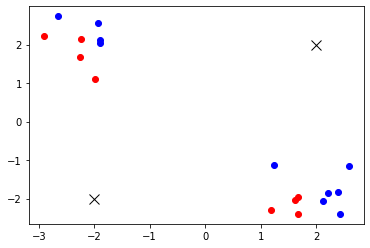

tensor([[ 0.2911, -0.5545],
        [ 0.1694, -0.0518]])
tensor([[ 2., -2.],
        [ 2., -2.]])
tensor(82.2666)


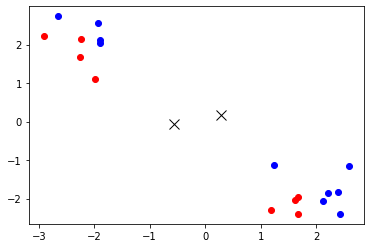

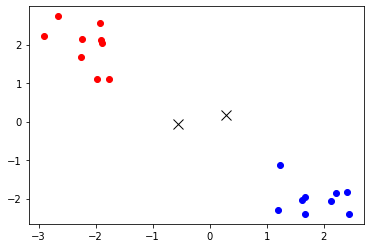

tensor([[ 1.9163, -2.0952],
        [-1.9143,  2.0540]])
tensor([[ 0.2911, -0.5545],
        [ 0.1694, -0.0518]])
tensor(4.5600)


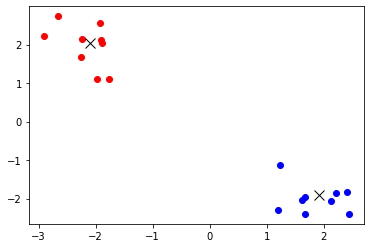

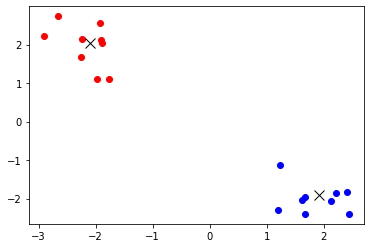

tensor([[ 1.9163, -2.0952],
        [-1.9143,  2.0540]])
tensor([[ 1.9163, -2.0952],
        [-1.9143,  2.0540]])
tensor(4.5600)


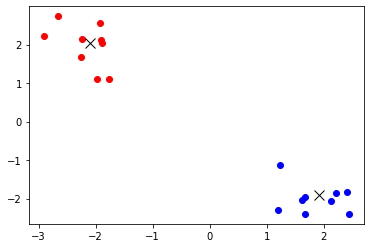

2
tensor(4.5600)
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])


tensor([[ 1.9163, -2.0952],
        [-1.9143,  2.0540]])

In [199]:
import torch
import hw4_utils
import matplotlib.pyplot as plt

def k_means(X=None, init_c=None, n_iters=50):
    """K-Means.

    Argument:
        X: 2D data points, shape [2, N].
        init_c: initial centroids, shape [2, 2]. Each column is a centroid. #two centroids
    
    Return:
        c: shape [2, 2]. Each column is a centroid.
    """

    
    # r_matrix = torch.argmin()
    if X is None:
        X, init_c = hw4_utils.load_data()
#     print(init_c)
    d1, N = X.shape
    d2, K = init_c.shape
    cost = 0
    new_c = torch.empty(2,2)

    old_c = init_c
    
    #plotting 0 step
#     hw4_utils.vis_cluster(c1, x1[:,1:-1], c2, x2[:,1:-1])
    
#     print(x2.shape)
    count=0
    while True:
        x1 = torch.tensor([0,0]).reshape(2,-1)
        x2 = torch.tensor([0,0]).reshape(2,-1)
        r_matrix = torch.zeros(N,K)

        for i in range (N):#data
            distance = 999999
            #assign r matrix            
            for k in range(K):#centroid
                new_distance = torch.dist(X[:,i], old_c[:,k])

                if distance > new_distance:
                    distance = new_distance
                    index = k
            r_matrix[i,index] = 1
            if index == 1:
#                 x1.append(X[:,i])
                
                x1 = torch.cat((x1, X[:,i].reshape(2,-1)), dim=1)
            else:
                x2 = torch.cat((x2, X[:,i].reshape(2,-1)), dim=1)
#         if count == 0:        
        hw4_utils.vis_cluster(old_c[:,0].reshape(d2,-1), x1[:,1:-1], old_c[:,1].reshape(d2,-1), x2[:,1:-1])                
        #assgin new centroids
        new_c =   X @ r_matrix
        for k in range (K):
            new_c[:,k] /= sum(r_matrix[:,k])
    
        print(new_c)
        print(old_c)
        c1 = new_c[:,0].reshape(d2,-1)
        c2 = new_c[:,1].reshape(d2,-1)
        
        #checking cost
        for i in range (N):
            for k in range (K):
                cost+= 1/2 *r_matrix[i,k] * torch.dist(X[:,i], new_c[:,k])**2
        print (cost)        
        cost = 0
        
        hw4_utils.vis_cluster(c1, x1[:,1:-1], c2, x2[:,1:-1])
        if torch.dist(new_c, old_c) == 0:
            
#             return new_c
            print (count)
            break
        else:
            count+=1
            old_c = new_c.clone()

            
        
#     init_c[:,0] = new_c[:,1]
#     init_c[:,1] = new_c[:,0]
    
#     plt.plot(X[0,:], X[1,:], 'ro')
#     plt.plot(init_c[0,:], init_c[1,:] ,'bo')
#     return init_c
    
    for i in range (N):
        for k in range (K):
            cost+= 1/2 * r_matrix[i,k] * torch.dist(X[:,i], new_c[:,k])**2
    print (cost)
    print(r_matrix)
    return new_c
k_means()
   


tensor([[1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.]])
tensor(11.)
tensor(9.)
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])
tensor(10.)
tensor(10.)
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.

tensor([[-2.0952,  1.9163],
        [ 2.0540, -1.9143]])

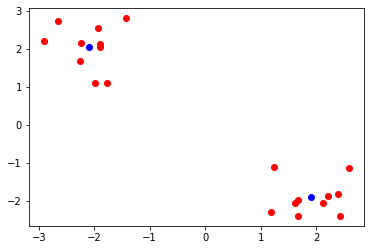

In [132]:
import torch
import hw4_utils
import matplotlib.pyplot as plt

def k_means(X=None, init_c=None, n_iters=50):
    """K-Means.

    Argument:
        X: 2D data points, shape [2, N].
        init_c: initial centroids, shape [2, 2]. Each column is a centroid. #two centroids
    
    Return:
        c: shape [2, 2]. Each column is a centroid.
    """

    
    # r_matrix = torch.argmin()
    if X is None:
        X, init_c = hw4_utils.load_data()
#     print(init_c)
    d1, N = X.shape
    d2, K = init_c.shape
 

    
    
    
#     new_c = torch.empty(2,2)
#     old_c = init_c   
    new_c = init_c
#     print(new_c)
#     while True:
    for num in range(4):

        r_matrix = torch.zeros(N,K)
#         print(r_matrix)
        for i in range (N):#data
            distance = 999999
            

            #assign r matrix
            
            for k in range(K):#centroid
                new_distance = torch.dist(X[:,i], new_c[:,k])
#                 print(new_distance)
                if distance > new_distance:
                    distance = new_distance
                    index = k
            r_matrix[i,index] = 1
            
        print(r_matrix)

        #assgin new centroids
        new_c =   X @ r_matrix
        for k in range (K):
            print(sum(r_matrix[:,k]))
            new_c[:,k] /= sum(r_matrix[:,k])

#         old_c = new_c.clone()

    init_c[:,0] = new_c[:,1]
    init_c[:,1] = new_c[:,0]
#     print(new_c.shape)
#     hw4_utils.vis_cluster(new_c[:,0], X[0,:], new_c[:,1], X[1,:])
    
    plt.plot(X[0,:], X[1,:], 'ro')
    plt.plot(init_c[0,:], init_c[1,:] ,'bo')
    return init_c
        
k_means()
   


In [75]:
m = torch.tensor([[1,2],[4,5]])
n = torch.tensor([[1, 0], [1,0]])

m@n

tensor([[3, 0],
        [9, 0]])